[3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


C:\Users\Žiga\AppData\Local\Temp\ipykernel_20512\1000219224.py:11: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-c*x)+d


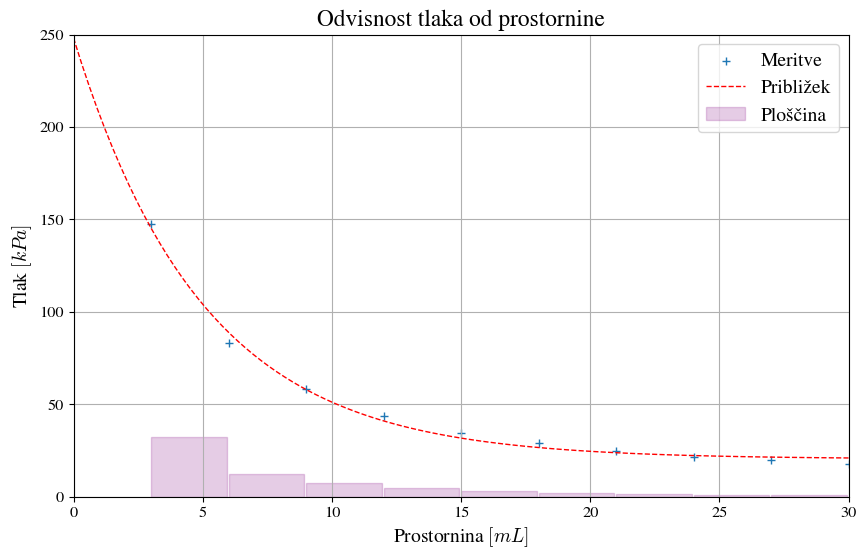

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
import math as mt 
import matplotlib.ticker as ticker
import plots
from scipy.optimize import curve_fit

def func(x, a, c, d):
    return a*np.exp(-c*x)+d

ex = pd.read_csv('Untitled.csv')
keyss = ex.keys()

P = [x for x in ex["Pressure1"]]
V = [x for x in ex["Volume1"]]

print(V)

plt.scatter(np.array(V), np.array(P), marker="+", label="Meritve")


start, end = plt.xlim()


x_apr = np.linspace(start, end, 100)
popt, pcov = curve_fit(func, V, P)

plt.plot(x_apr, func(x_apr, *popt), label="Približek", linestyle="dashed", color="red")

for i,x in enumerate(P):
    if(i == len(P) - 1):
        continue

    plt.gca().add_patch(plt.Rectangle((V[i], 0), abs(V[i] - V[i+1]) -0.07 , abs( (P[i+1] + P[i]) / 2), alpha=0.2, color="purple", label="Ploščina" if i == 1 else "")
)

plt.grid()
plt.legend()
plt.title("Odvisnost tlaka od prostornine")
plt.xlabel(r"Prostornina $[mL]$")
plt.ylabel(r"Tlak $[kPa]$")
plt.savefig("pv.png", dpi=200)
#print(ex.keys())
